In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load features and labels

file_truth = "../data/raw_data/example_ground_truth.csv"
file_border = "./border.csv"
file_ratio = "./ratio.csv"

df_truth = pd.read_csv(file_truth)
df_border = pd.read_csv(file_border)
df_ratio = pd.read_csv(file_ratio)

# Combine the features and labels
df = df_truth.drop(["seborrheic_keratosis"],axis=1)

df_f = pd.merge(df_border, df_ratio, on="img")
df_f = df_f.rename(columns = {"img":"image_id"})
for i in range(len(df_f)):
    df_f["image_id"][i] = df_f["image_id"][i].split("_s")[0]

print(df_f.shape)
df = pd.merge(df, df_f, on="image_id")
print(df.shape)
df

(150, 5)
(150, 6)


<ipython-input-2-ca00557e7407>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f["image_id"][i] = df_f["image_id"][i].split("_s")[0]


,image_id,melanoma,perimeter,area,circularity,ratio
0,ISIC_0001769,0.0,2013.0,216160.0,1.491772,5395354
1,ISIC_0001852,0.0,1372.0,130493.0,1.147919,10283927
2,ISIC_0001871,0.0,1720.0,205116.0,1.147751,3716997
3,ISIC_0003462,0.0,1344.0,161705.0,0.888925,2617435
4,ISIC_0003539,0.0,2063.0,317040.0,1.068254,8740042
...,...,...,...,...,...,...
145,ISIC_0015443,0.0,13775.0,9732988.0,1.551412,72837178
146,ISIC_0015445,0.0,19517.0,12049938.0,2.515541,988871697
147,ISIC_0015483,0.0,13813.0,8856478.0,1.714372,135852416
148,ISIC_0015496,0.0,13742.0,8951522.0,1.678778,97929678


<AxesSubplot:>

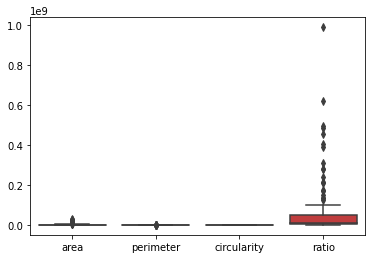

In [5]:
#boxplot of the area and perimeter
dff = df[['area', 'perimeter', 'circularity', 'ratio']]
sns.boxplot(data = dff)



area and its count [(117, 32944.0), (9, 2800336.0), (5, 5567728.0), (5, 8335120.0), (2, 11102512.0), (2, 13869904.0), (3, 16637296.0), (1, 19404688.0), (4, 22172080.0), (2, 24939472.0)] 
 area and its count [(73, 642.0), (31, 3167.8), (15, 5693.6), (6, 8219.400000000001), (6, 10745.2), (8, 13271.0), (3, 15796.800000000001), (6, 18322.600000000002), (1, 20848.4), (1, 23374.2)]


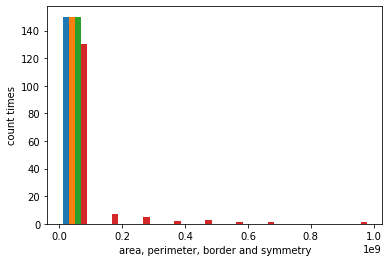

In [16]:
#histogram of the area and perimeter
plt.hist(dff)
plt.xlabel('area, perimeter, border and symmetry')
plt.ylabel('count times')
a = np.histogram(df['area'])
b = np.histogram(df['perimeter'])
print('area and its count',list(zip(a[0],a[1])),'\n','area and its count',list(zip(b[0],b[1])))

#the issue is that if we plot the two together, we can only see the area because the area is significantly larger than the perimeter

           area  perimeter  circularity      ratio
0      216160.0     2013.0     1.491772    5395354
1      130493.0     1372.0     1.147919   10283927
2      205116.0     1720.0     1.147751    3716997
3      161705.0     1344.0     0.888925    2617435
4      317040.0     2063.0     1.068254    8740042
..          ...        ...          ...        ...
145   9732988.0    13775.0     1.551412   72837178
146  12049938.0    19517.0     2.515541  988871697
147   8856478.0    13813.0     1.714372  135852416
148   8951522.0    13742.0     1.678778   97929678
149   3193093.0     8751.0     1.908508   73988770

[150 rows x 4 columns]
mean 4.4408920985006264e-17
var 1.0


<AxesSubplot:>

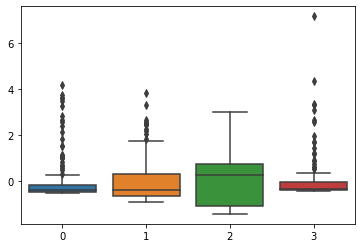

In [10]:
#nomalizes the data so we can visualize both better 
from sklearn import preprocessing
print(dff)
scaled_data_dff = preprocessing.StandardScaler().fit(dff).transform(dff)
#plt.hist(scaled_data)

print('mean',scaled_data_dff.mean()) #small number close to 0, round of error
print('var',scaled_data_dff.var())
sns.boxplot(data = scaled_data_dff)

Text(0, 0.5, 'count times')

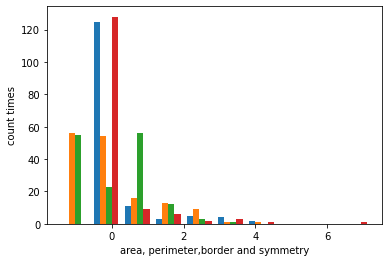

In [17]:
plt.hist(scaled_data_dff)
plt.xlabel('area, perimeter,border and symmetry')
plt.ylabel('count times')

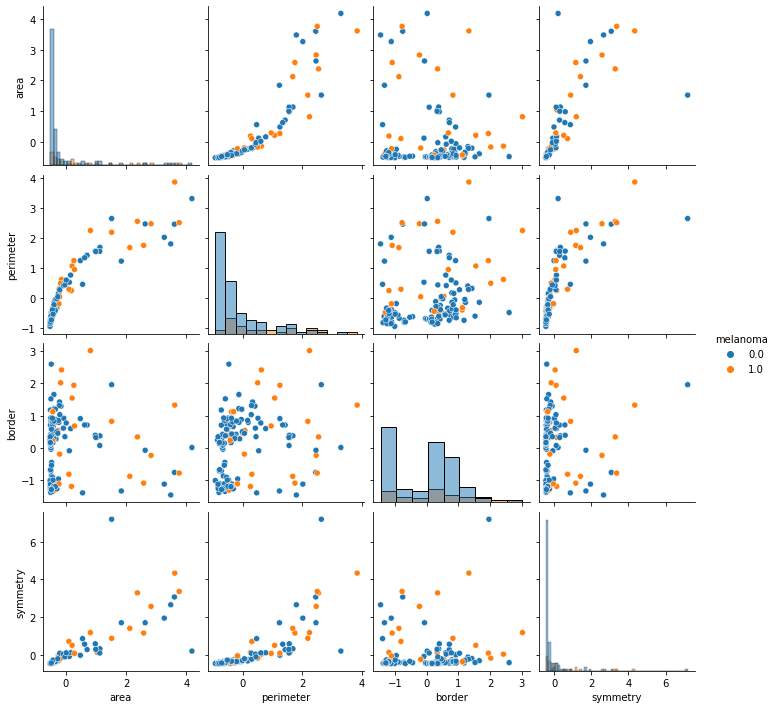

In [18]:
#we use the scaled data for this 
#we do this to see what features the cancer and cancer-free lesions have
df2 = pd.DataFrame(scaled_data_dff,columns=['area','perimeter','border','symmetry'])
df2['melanoma'] = df['melanoma']
sns.pairplot(df2,hue="melanoma",diag_kind="hist")

In [ ]:
#conclsuons we can get:


# Area and perimeter have a strong correlation. Border and area do not. The border can vary from being very smooth to not as much- independently
# of the area. However, most of the noncancerous lesions are more likely to be smaller, no matter the border smoothness to some extent, 
# while the cancerous ones show a rogue behaviour as they are more spread out seeing no restrictions in their size or border crisp.
# Area and symmetry do have a correlation, suggesting the smaller the area the less chances there are of the lesions being asymmetric.
# Once again, the noncancerous lesions are more likely to be smaller and more symmetric, while the cancerous ones are very spread.

# Perimeter and border have a very similar behaviour to the area/border comparison. No correlation, but the noncancerous are more 
# likely to be smaller, however, in this case they are not as dependent on that matter. And, again, when comparing perimeter and symmetry,
# noncancerous lesions are very symmetric, but do not seem to be as restricted by its perimeter. This suggests that the sickness is more 
# restricted to the area and not the perimeter.
#  
# 
# Moreover, plotting the border with the symmetry we can see that most of the noncancerous lesions are highly symmetrical and the 
# smoothness of its borders can highly vary. While most of the cancerous lesions range from symmetrical to highly asymmetrical, and from 
# smooth to very crispy.

# In conclusion, according to our data, cancerous lesions do not seem to follow any restrictions. They act rogue, independent of its size,
# border smoothness or symmetry. However, noncancerous lesions do seem to follow a pattern. The latter are more likely to be small and 
# symmetric. These show no corrleation with the border smoothness. 
